### Data Cleaning

In [31]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/mahakkoli/Desktop/Datasets _Python/marketing_campaign.csv', sep="\t")
data.head(10)
data.shape

(2240, 29)

In [32]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [33]:
data = data.dropna()
data.shape

(2216, 29)

In [34]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_33273/1415931200.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


In [ ]:
##Creating a feature ("customer_days") of the number of days the customers started to shop in the store relative to the last recorded date


In [35]:
days = []
d1 = max(dates)
for i in dates:
    delta = d1 - i
    days.append(delta)
data["customer_days"] = days
data["customer_days"] = pd.to_numeric(df["customer_days"], errors="coerce")

In [36]:
#exploring the unique values in the categorical features to get a clear idea of the data

print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64


In [37]:
#Feature Engineering
# Extracting Age of customer today 
if "Age" not in data.columns:
    data["Age"] = 2024 - data["Year_Birth"]

# Total spendings on various items
if "Spent" not in data.columns:
    data["Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

# Deriving living situation by marital status "Alone"
if "Living_With" not in data.columns:
    data["Living_With"] = data["Marital_Status"].replace({"Married": "Partner", "Together": "Partner", "Absurd": "Alone", "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"})

# Feature indicating total children living in the household
if "Children" not in data.columns:
    data["Children"] = data["Kidhome"] + data["Teenhome"]

# Feature for total members in the household
if "Family_Size" not in data.columns:
    data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]

# Feature pertaining parenthood
if "Is_Parent" not in data.columns:
    data["Is_Parent"] = np.where(data.Children > 0, 1, 0)

# Segmenting education levels into three groups - Undergraduate, Graduate, Postgraduate
if "Education" not in data.columns:
    data["Education"] = data["Education"].replace({"Basic": "Undergraduate", "2n Cycle": "Undergraduate", "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "Postgraduate"})

# Better naming system
data = data.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits", "MntMeatProducts": "Meat", "MntFishProducts": "Fish", "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})

# Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)


In [38]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,customer_days,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,4.423735e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.937600e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.927040e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


In [ ]:
#The above stats show some discrepancies in mean Income and Age and max Income and age.

#note that max-age is 128 years, As I calculated the age that would be today (i.e. 2024) and the data is old.

#I must take a look at the broader view of the data. I will plot some of the selected features.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 640x480 with 0 Axes>

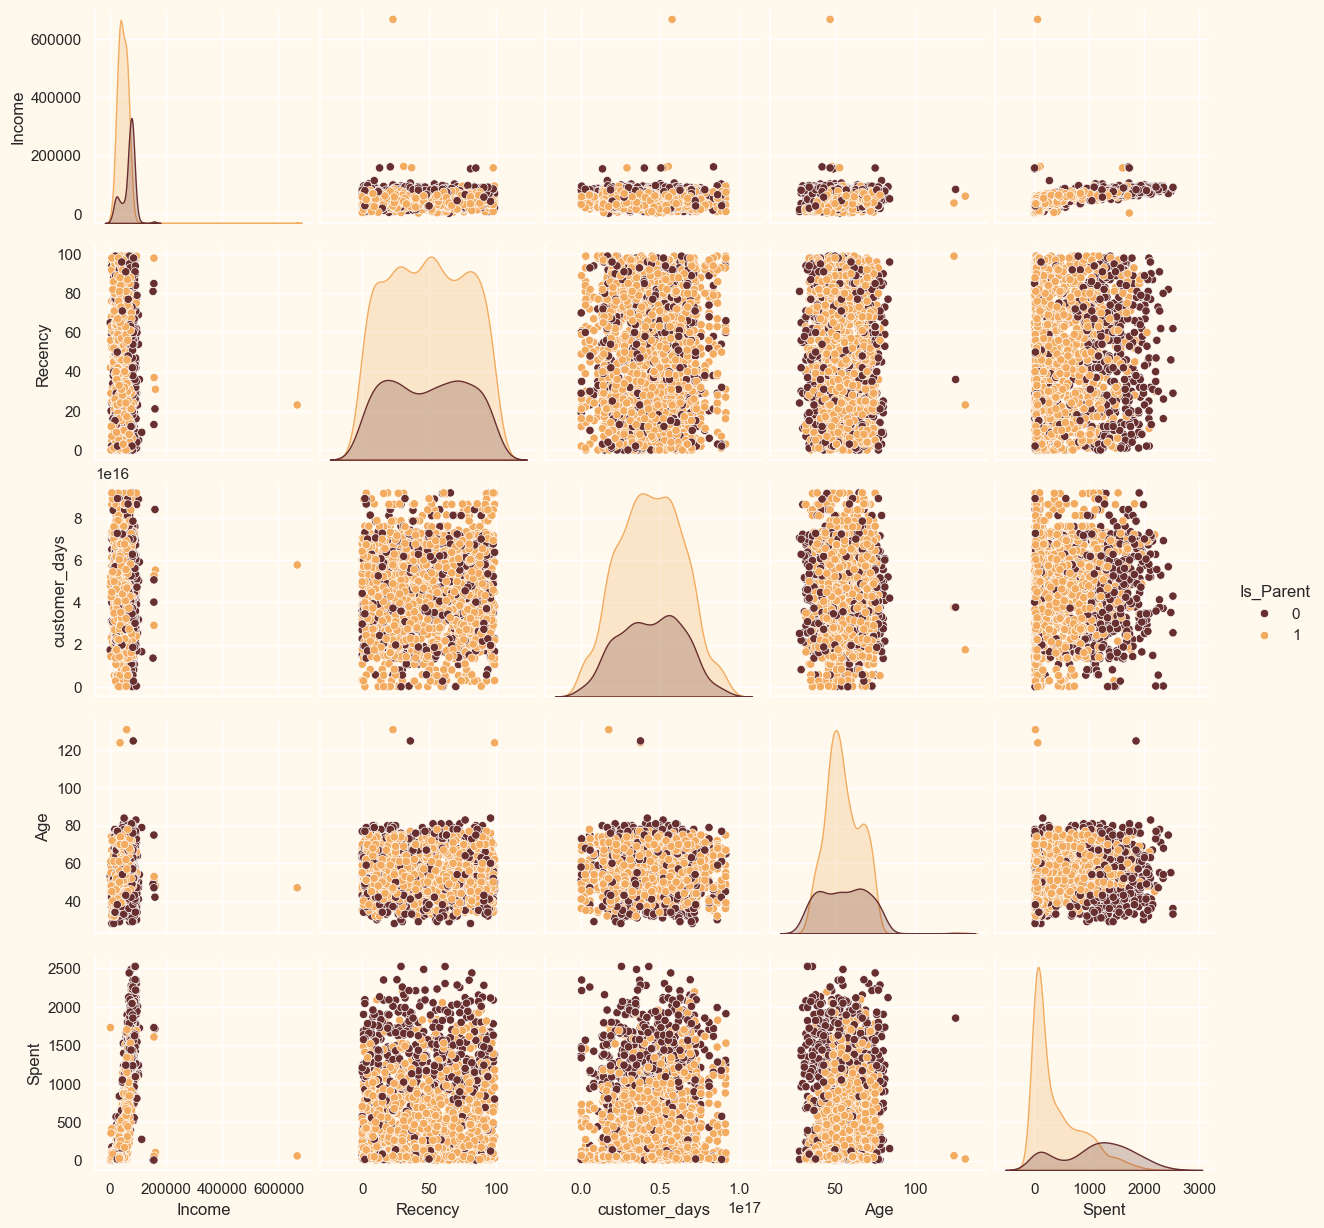

In [43]:
import matplotlib.pyplot as plt
from matplotlib import colors

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "customer_days", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()



In [44]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


### Data Preprocessing


In [45]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

Categorical variables in the dataset: ['Education', 'Living_With']
All features are now numerical


In [47]:

ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [50]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,customer_days,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.352543,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.973583,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.352543,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.665144,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.352543,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.172664,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.352543,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.923210,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.429916,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.822130,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [52]:
#Initiating PCA to reduce dimentions aka features to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,1.027910e-16,2.877562,-5.943368,-2.542250,-0.775277,2.409898,7.466344
col2,2212.0,-3.212219e-17,1.713747,-4.330659,-1.339979,-0.149865,1.225297,6.312180
col3,2212.0,-5.139550e-17,1.247795,-4.080533,-0.843797,0.005682,0.811116,5.527723


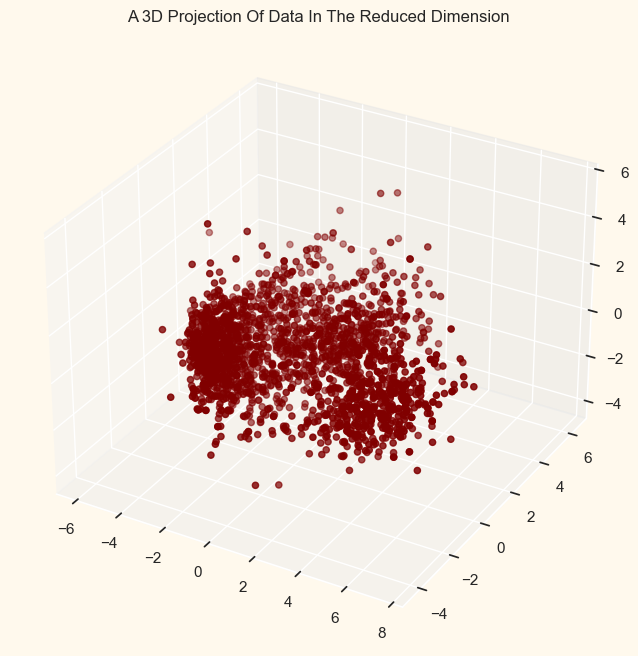

In [53]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed:


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

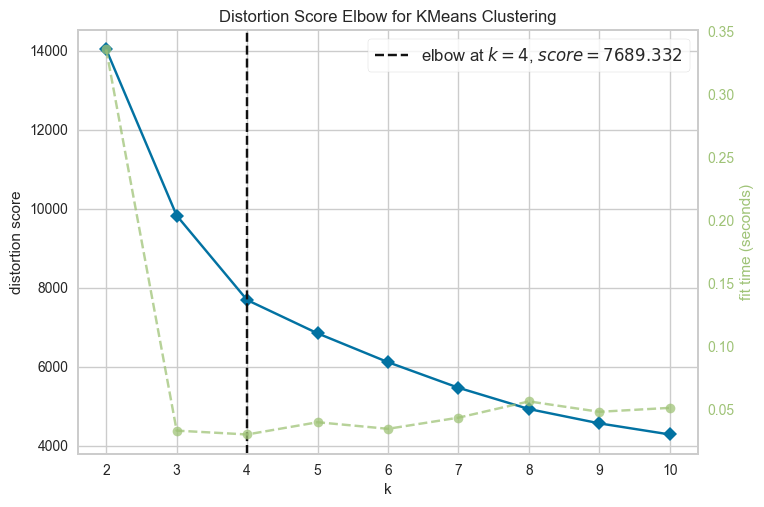

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
#The above cell indicates that four will be an optimal number of clusters for this data.
#Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

### Clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

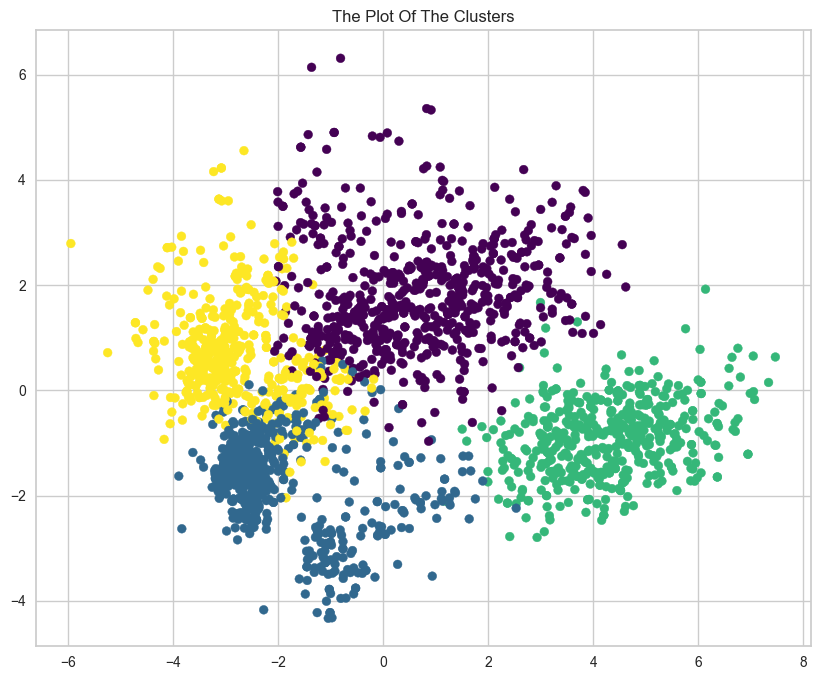

In [79]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)  # Creating a 2D subplot instead of 3D
ax.scatter(x, y, s=40, c=PCA_ds["Clusters"], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters")
plt.show()


/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_33273/1302384611.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= 'viridis')


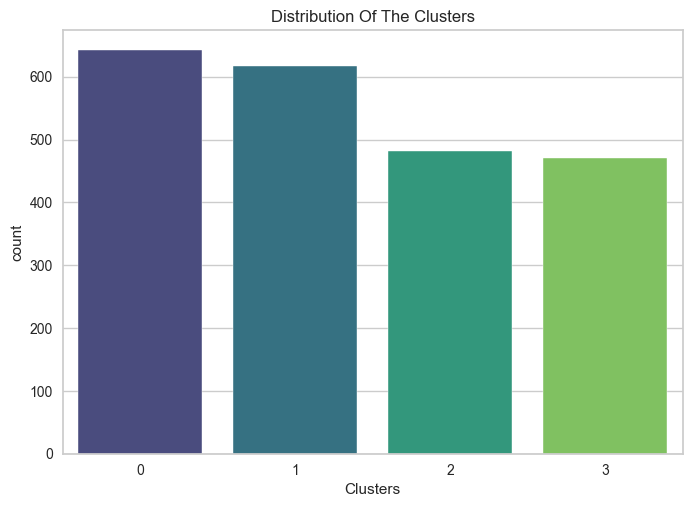

In [78]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= 'viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

#The clusters seem to be fairly distributed

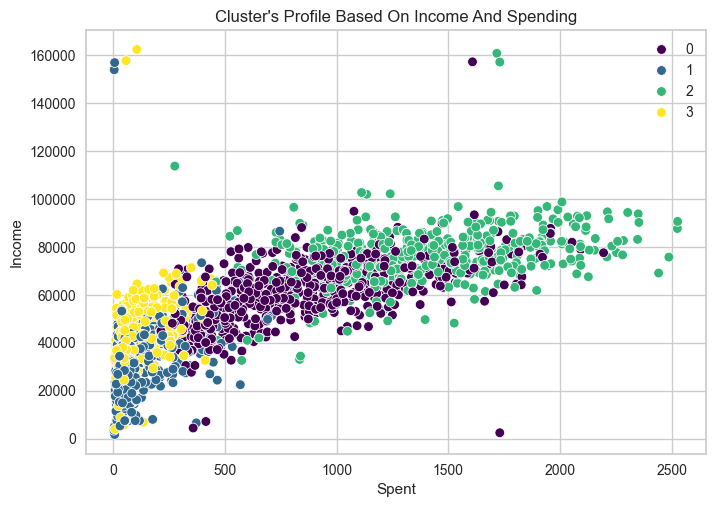

In [77]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= 'viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
#Income vs spending plot shows the clusters pattern

#group 0 : high spending & above average income
#group 1 : low spending & low income
#group 2 : high spending & high income
#group 3 : low spending & below average income 

/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_33273/3996012893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=data["Clusters"], y=data["Spent"], palette='viridis', size=4)


<AxesSubplot: xlabel='Clusters', ylabel='Spent'>

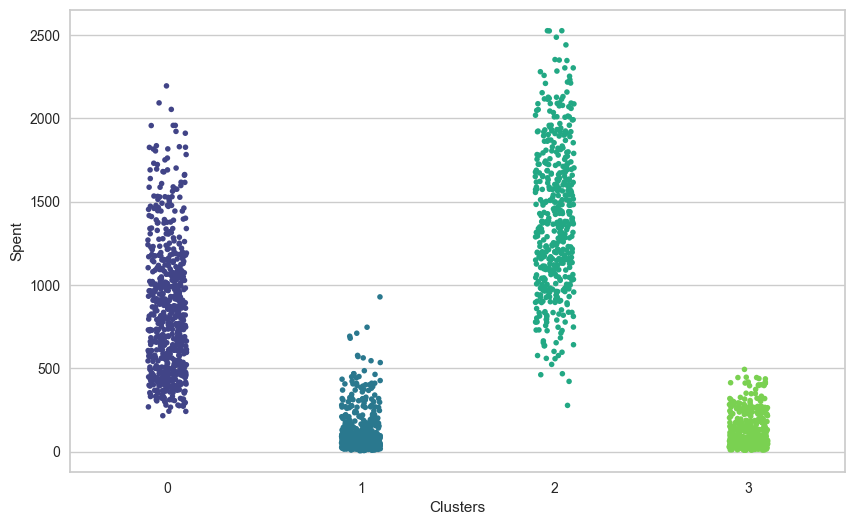

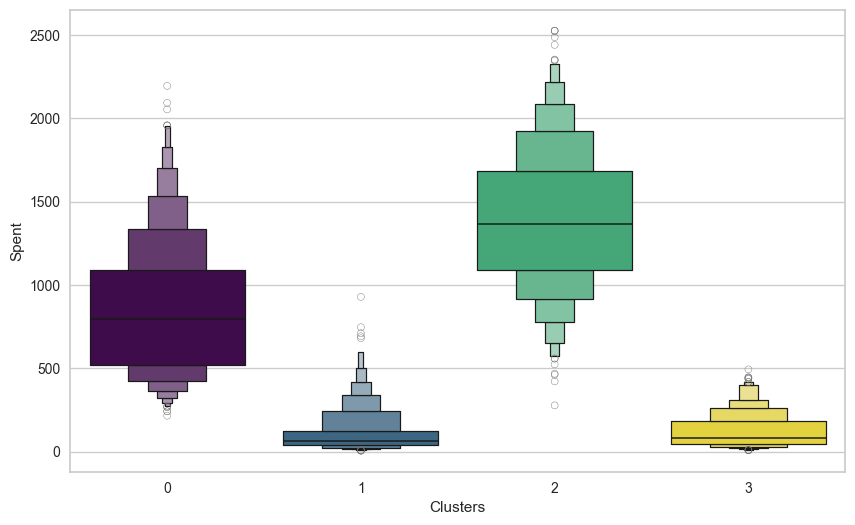

In [82]:

import seaborn as sns

# Decrease marker size and use stripplot
plt.figure(figsize=(10, 6))
sns.stripplot(x=data["Clusters"], y=data["Spent"], palette='viridis', size=4)

# Assign x variable to hue and set legend=False for future compatibility
plt.figure(figsize=(10, 6))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], hue=data["Clusters"], palette='viridis', legend=False)


In [ ]:
#From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers 
#closely followed by cluster 0. 
#We can explore what each cluster is spending on for the targeted marketing strategies.

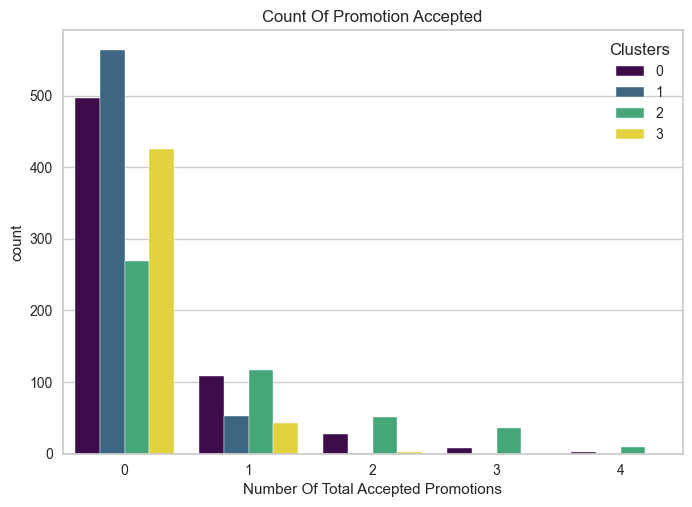

In [83]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= 'viridis')
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

In [ ]:
##Perhaps better-targeted and well-planned campaigns are required to boost sales. 
##None of the groups have overwhelmingly participated in promotions

/var/folders/vz/7pslxg3d1pd49tkf6rc5vdvr0000gn/T/ipykernel_33273/3235290680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= 'viridis')


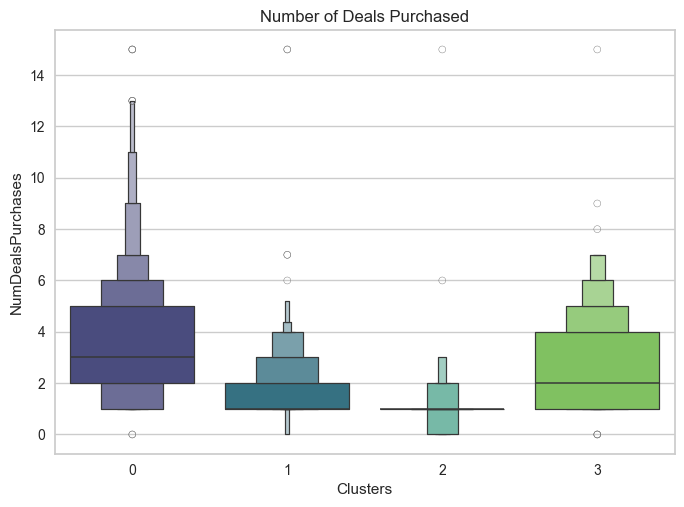

In [84]:
plt.figure()
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= 'viridis')
pl.set_title("Number of Deals Purchased")
plt.show()

In [ ]:
#Unlike promotions, the deals offered did well. 
##It has best outcome with cluster 0 and cluster 3. 
##However, our star customers cluster 1 are not into the deals. 
#And Nothing seems to attract cluster 2 overwhelmingly.

In [ ]:
##I will be profiling the clusters formed and 
#come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.


<Figure size 800x550 with 0 Axes>

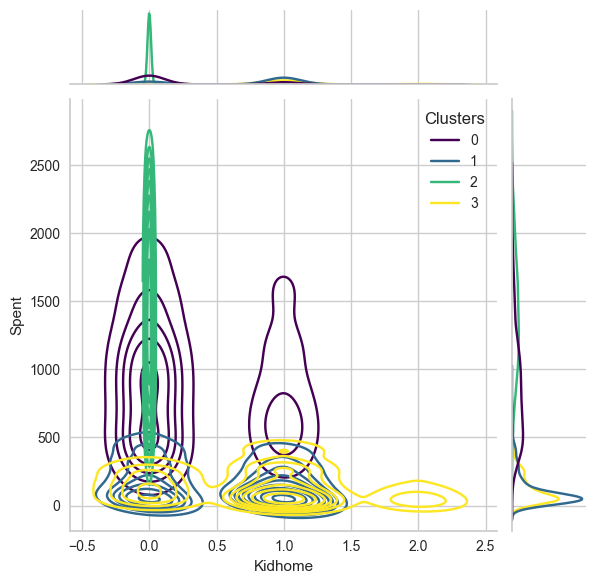

<Figure size 800x550 with 0 Axes>

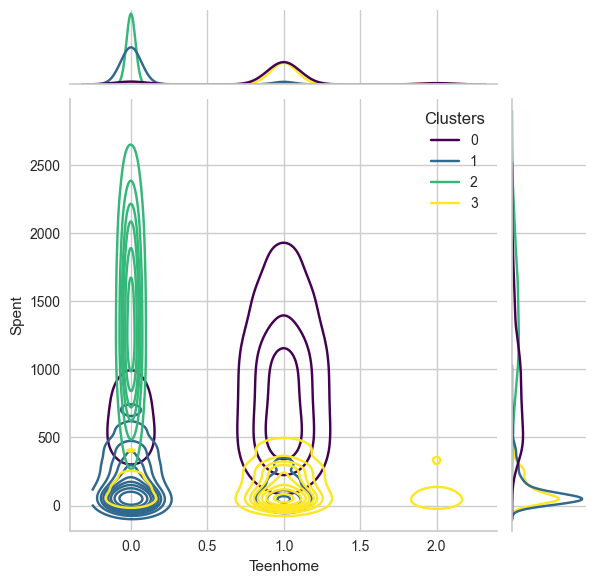

<Figure size 800x550 with 0 Axes>

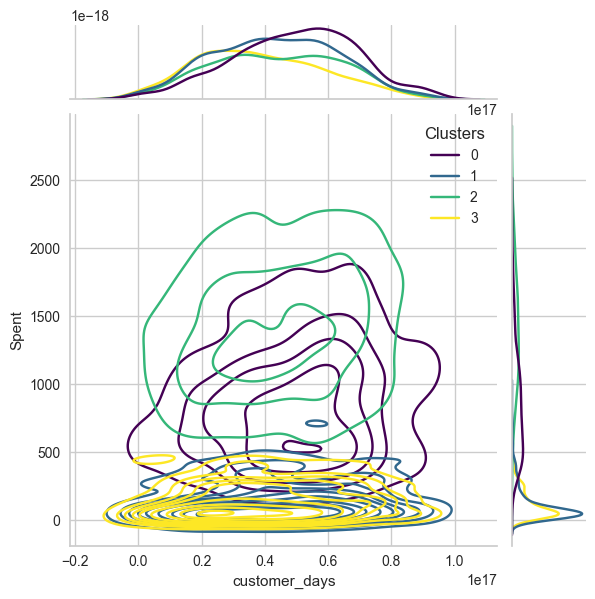

<Figure size 800x550 with 0 Axes>

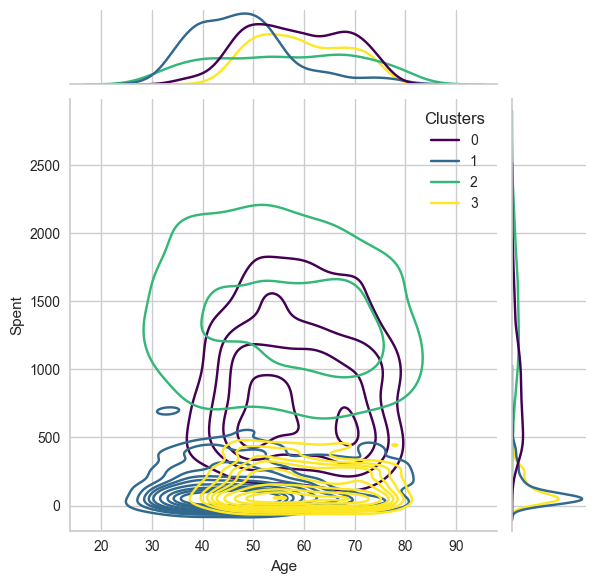

<Figure size 800x550 with 0 Axes>

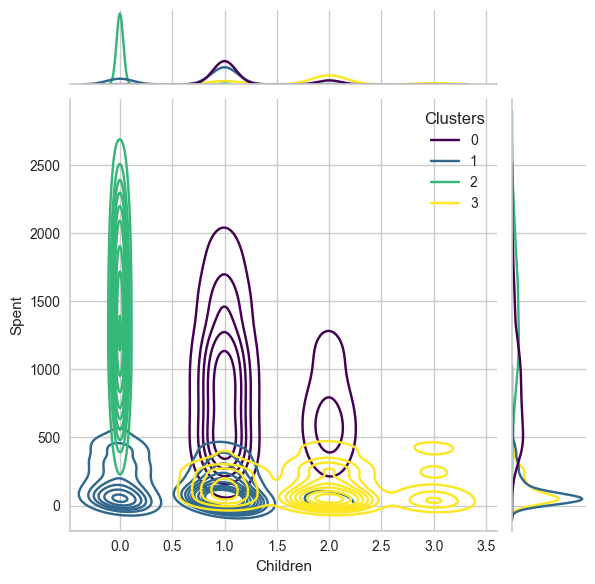

<Figure size 800x550 with 0 Axes>

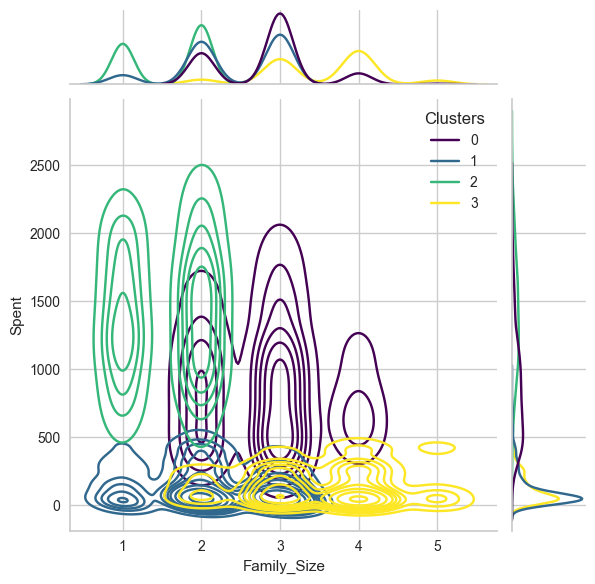

/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

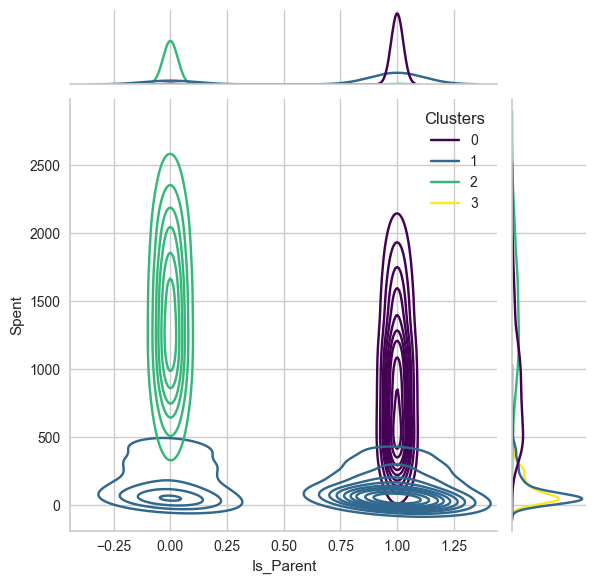

<Figure size 800x550 with 0 Axes>

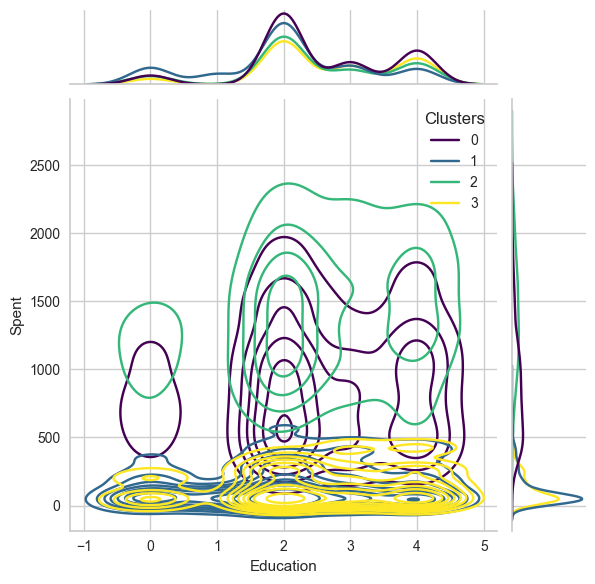

<Figure size 800x550 with 0 Axes>

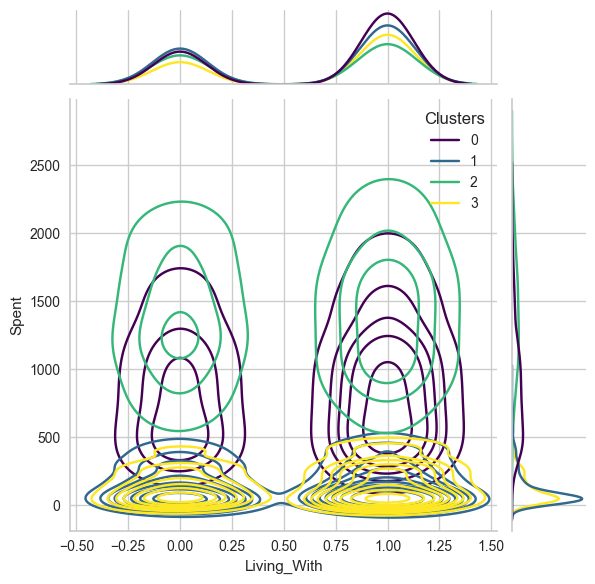

In [88]:
Personal = [ "Kidhome","Teenhome","customer_days", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue =data["Clusters"], kind="kde", palette='viridis')
    plt.show()

In [87]:
import os

# Create a directory to save the plots if it doesn't exist
save_dir = "saved_plots"
os.makedirs(save_dir, exist_ok=True)

for i in Personal:
    plt.figure()
    sns.jointplot(x=data[i], y=data["Spent"], hue=data["Clusters"], kind="kde", palette='viridis')
    plt.savefig(os.path.join(save_dir, f"{i}_plot.png"))  # Save each plot to a file
    plt.close()  # Close the plot to release memory


/opt/homebrew/lib/python3.10/site-packages/seaborn/axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)


<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>

<Figure size 800x550 with 0 Axes>